**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , ConfusionMatrixDisplay , classification_report
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as st
from sklearn.feature_selection import f_classif , f_oneway , f_classif , SelectKBest
from sklearn.preprocessing import FunctionTransformer
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

**Importing Dataset**

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\Brain-tumor-detection.csv")
df.head()

,Unnamed: 0,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


**Data Description:**
* Unnamed 0: Index column
* Area: Area of the tumor detected in mm
* Perimeter: The perimeter of the tumor detected
* Convex Area: The area of the convex hull covering the tumor 
* Solidity: Solidity of the brain tissue. More solidity, higher the chance of having a tumor
* Equivalent Diameter: Diameter of the tumor
* Major axis, Minor axis : axis information required for finding the stage of the tumor
* Eccentricity: Elongation or roundness of the tumor indicating the severity/ aggressiveness
* Class: Target variable, 1- Tumor detected, 0- No tumor detected


## Data Preprocessing
### 1. Exploratory Data Analysis

**Shape of Dataframe**

In [3]:
df.shape

(241, 10)

**Dataframe's Features**

In [4]:
df.columns

Index(['Unnamed: 0', 'Area', 'Perimeter', 'Convex Area', 'Solidity',
       'Equivalent Diameter', 'Major Axis', 'Minor Axis', 'Eccentricity',
       'Class'],
      dtype='object')

**Dataframe information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           241 non-null    int64  
 1   Area                 241 non-null    float64
 2   Perimeter            241 non-null    float64
 3   Convex Area          241 non-null    float64
 4   Solidity             241 non-null    float64
 5   Equivalent Diameter  241 non-null    float64
 6   Major Axis           241 non-null    float64
 7   Minor Axis           241 non-null    float64
 8   Eccentricity         241 non-null    object 
 9   Class                241 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 19.0+ KB


**Dropping/Removing unwanted columns , that is not important for my analysis and prediction.**

In [6]:
df.drop('Unnamed: 0' , axis=1 , inplace=True)
df.head()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


**I dropp a columns because they its not giving me valuable insight and they was not useful for predictions.**

**Datatype Casting**

In [7]:
df.dtypes

Area                   float64
Perimeter              float64
Convex Area            float64
Solidity               float64
Equivalent Diameter    float64
Major Axis             float64
Minor Axis             float64
Eccentricity            object
Class                    int64
dtype: object

In [8]:
df['Eccentricity'] = df['Eccentricity'].astype('complex')
df['Class'] = df['Class'].astype('object')
print(df.dtypes)

Area                      float64
Perimeter                 float64
Convex Area               float64
Solidity                  float64
Equivalent Diameter       float64
Major Axis                float64
Minor Axis                float64
Eccentricity           complex128
Class                      object
dtype: object


In [9]:
df['Class'] = df['Class'].astype('int')

**Our Dataframe contains all features numeric except "Eccentricity" feature, We have one Object datatype feature.**

**Duplicates Values**

In [10]:
df.duplicated().sum()

51

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

**Dataset contains 51 duplicates records , I made a decision to drop them because, If I dont drop them ML model will not train proper and predict proper because of same values , Thats why I dropped that duplicated records.**

**Missing Values**

In [13]:
df.isna().sum()

Area                   0
Perimeter              0
Convex Area            0
Solidity               0
Equivalent Diameter    0
Major Axis             0
Minor Axis             0
Eccentricity           0
Class                  0
dtype: int64

**There us no missing values in records.**

**Structural Errors**

In [14]:
for i in df.columns:
    print(i , df[i].unique())

Area [6.314500e+03 5.277650e+04 5.023250e+04 4.486000e+03 1.450000e+02
 4.767500e+03 3.205900e+04 5.470900e+04 4.123500e+03 1.291300e+04
 9.538000e+03 6.028500e+03 3.950000e+02 3.008000e+03 1.160500e+03
 2.111000e+03 6.403500e+03 7.910000e+02 6.016450e+04 5.986450e+04
 9.546500e+03 1.253550e+04 1.187000e+03 3.294500e+03 9.700000e+03
 6.653000e+03 4.415000e+03 8.275000e+02 2.320000e+02 2.859000e+03
 9.300000e+02 1.035500e+04 6.065000e+02 7.105000e+02 2.130500e+03
 7.335000e+02 3.660000e+02 1.565500e+03 8.765550e+04 1.325500e+03
 4.365000e+02 6.460000e+02 1.437750e+04 6.100000e+01 3.971500e+03
 2.935000e+02 6.976500e+04 1.437500e+03 1.330000e+02 3.869725e+05
 1.600000e+01 1.852500e+03 8.150000e+01 0.000000e+00 8.100000e+01
 2.355000e+02 2.886500e+03 4.153000e+03 7.748500e+03 1.385500e+03
 3.070000e+02 4.846500e+03 4.905500e+03 1.306000e+03 2.757000e+03
 1.750500e+03 1.390500e+03 3.996000e+03 1.759000e+03 3.560000e+02
 7.460000e+02 5.145000e+03 6.620000e+02 4.050000e+01 1.525000e+02
 1.97

In [15]:
#structural errors
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [16]:
df['eccentricity'] = df['eccentricity'].apply(lambda x: abs(x))

In [17]:
df['eccentricity'] = df['eccentricity'].astype('float')

In [18]:
df

,area,perimeter,convex_area,solidity,equivalent_diameter,major_axis,minor_axis,eccentricity,class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,1.378312,1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,1.658266,1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,1.335325,1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,1.030671,1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,1.388168,1
...,...,...,...,...,...,...,...,...,...
236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,2.013375,0
237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,1.800646,0
238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,0.296509,0
239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,0.206967,0


**Outliers Identification/Villians**

area                      Axes(0.125,0.653529;0.227941x0.226471)
perimeter              Axes(0.398529,0.653529;0.227941x0.226471)
convex_area            Axes(0.672059,0.653529;0.227941x0.226471)
solidity                  Axes(0.125,0.381765;0.227941x0.226471)
equivalent_diameter    Axes(0.398529,0.381765;0.227941x0.226471)
major_axis             Axes(0.672059,0.381765;0.227941x0.226471)
minor_axis                    Axes(0.125,0.11;0.227941x0.226471)
eccentricity               Axes(0.398529,0.11;0.227941x0.226471)
class                      Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

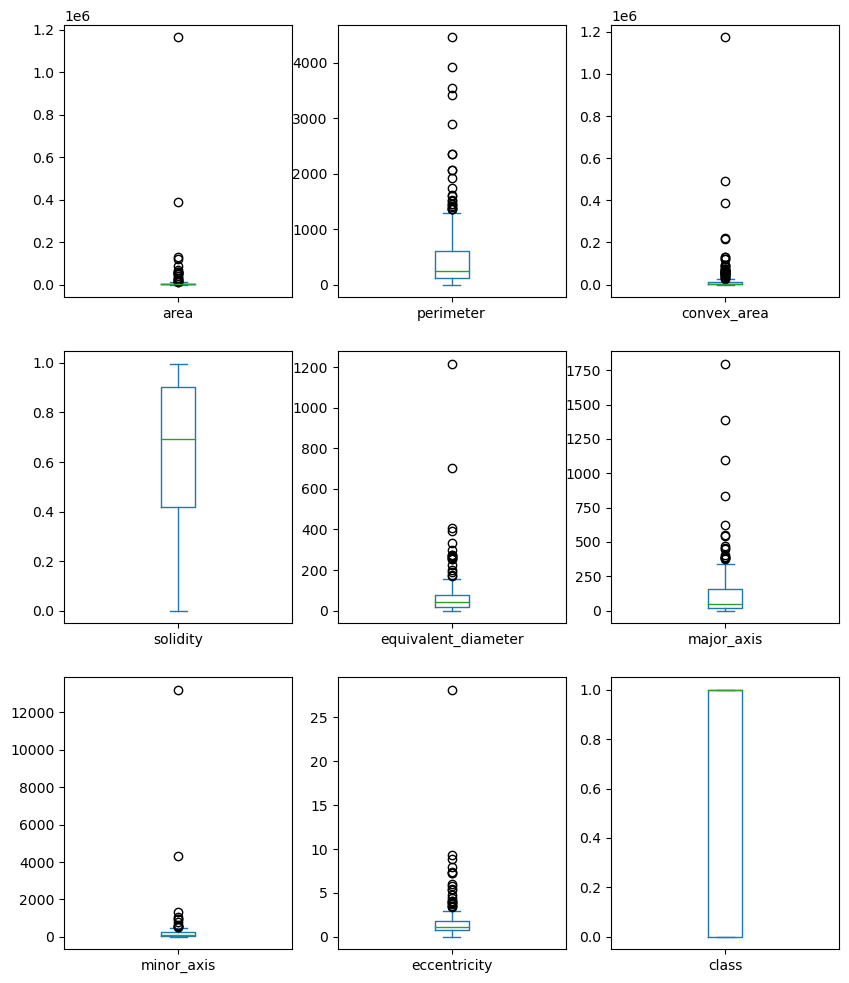

In [19]:
numeric_df = df.select_dtypes(exclude='object')
numeric_df.plot(kind = 'box' , subplots = True , layout = (3,3) , figsize=(10,12))

**There is ouliers in "Area" , "Perimeter" , "Convex Area"  , "Equivalent Diameter" , "Major Axis" , "Minor Axis", I will treat these outliers in data cleaning after splitting the data.**

**Normally Distribution Identification**

In [20]:
df

,area,perimeter,convex_area,solidity,equivalent_diameter,major_axis,minor_axis,eccentricity,class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,1.378312,1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,1.658266,1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,1.335325,1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,1.030671,1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,1.388168,1
...,...,...,...,...,...,...,...,...,...
236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,2.013375,0
237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,1.800646,0
238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,0.296509,0
239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,0.206967,0


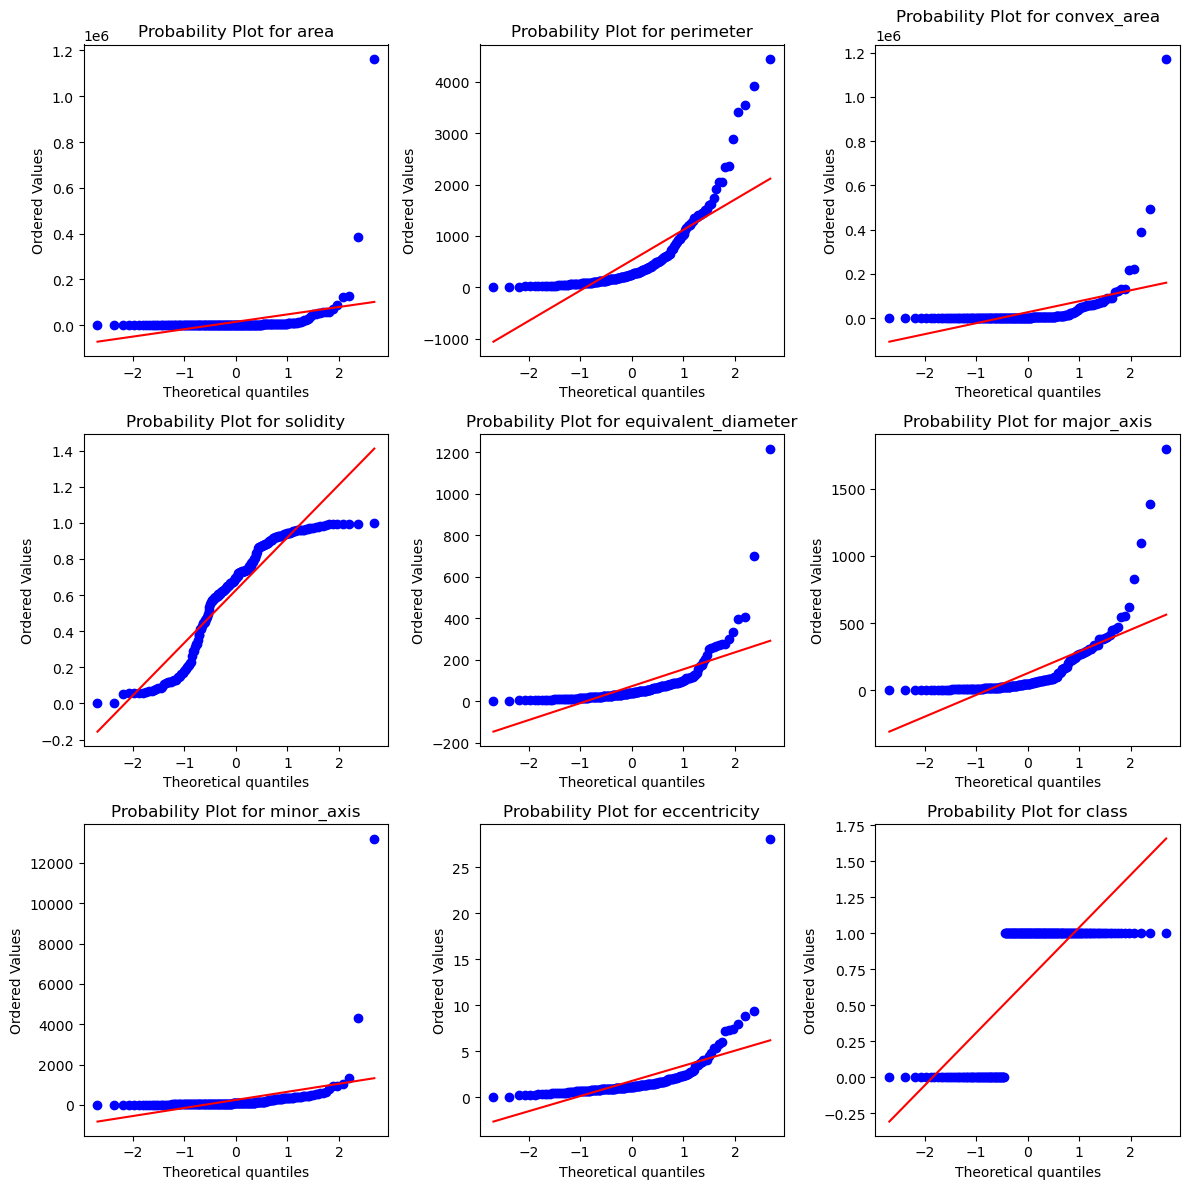

In [21]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

axs = axs.flatten()

for i, col in enumerate(df):
    st.probplot(df[col], plot=axs[i])
    axs[i].set_title(f'Probability Plot for {col}')

plt.tight_layout()
plt.show()

**Data looks non normally distributed but gor Gaussian Naive Bayes Alg , Data should be Normally distributed, I will make this data as Normally distributed in data cleaning.**

area


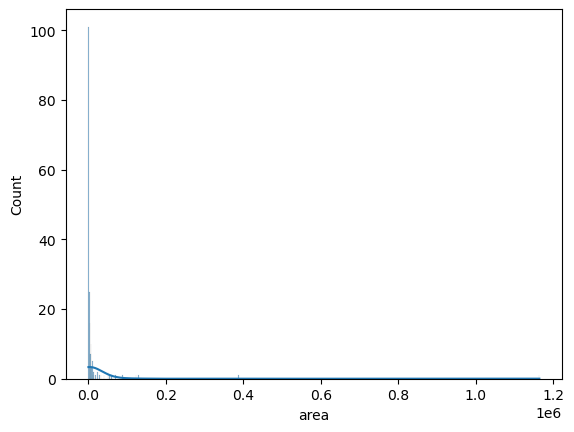

perimeter


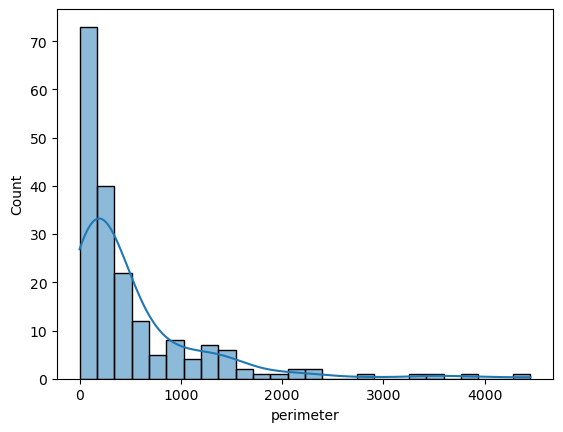

convex_area


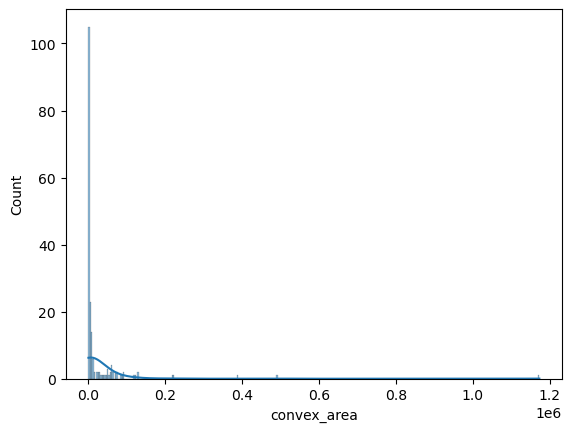

solidity


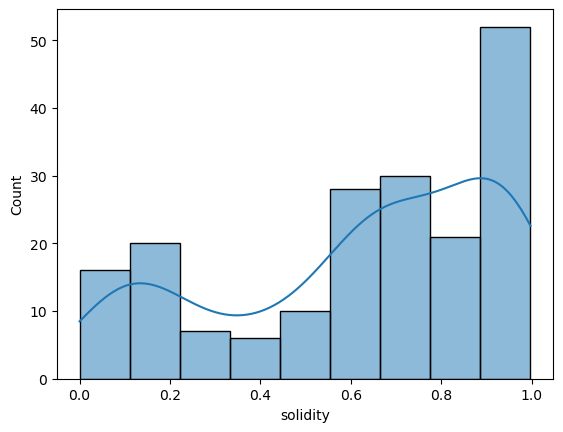

equivalent_diameter


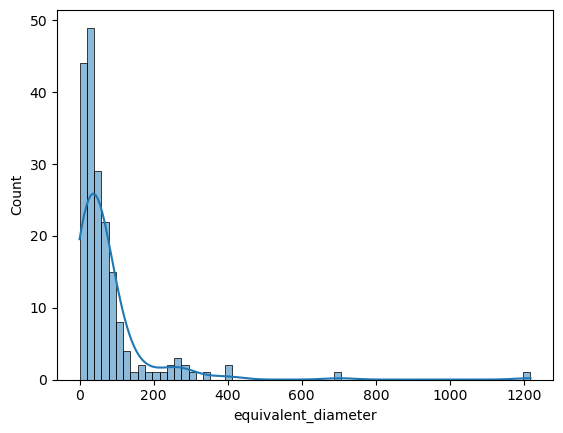

major_axis


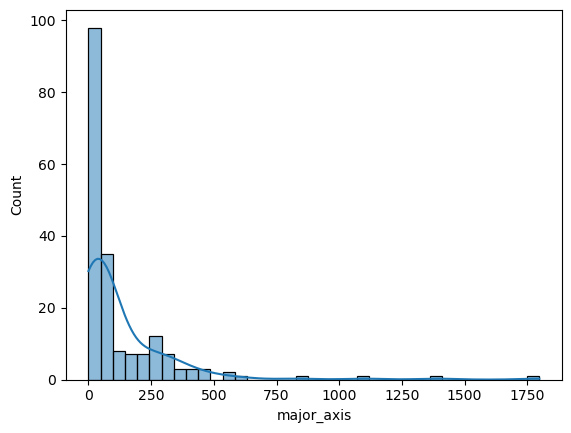

minor_axis


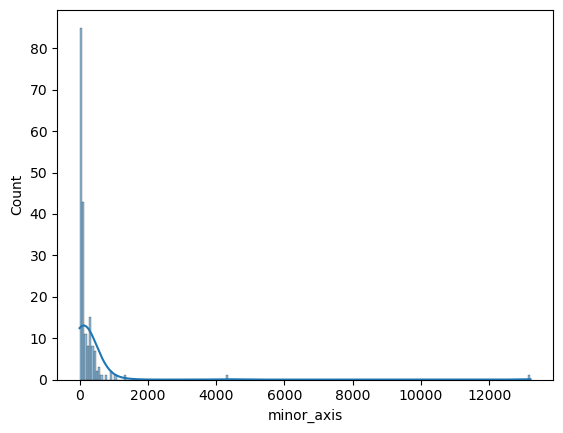

eccentricity


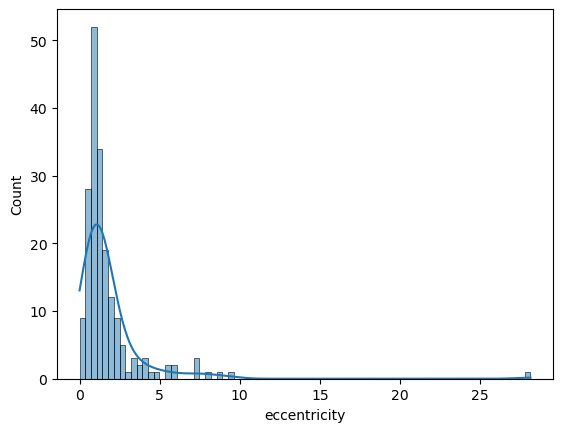

class


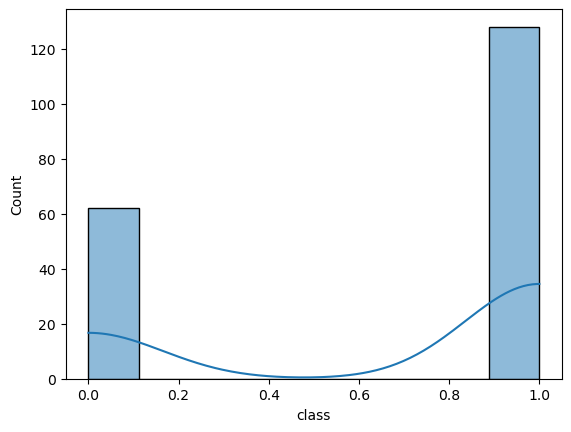

In [22]:
for i in df.select_dtypes(exclude='object').columns:
    print(i)
    sns.histplot(kde=True,data=df[i])
    plt.show()

In [23]:
df.corr(numeric_only=True)

,area,perimeter,convex_area,solidity,equivalent_diameter,major_axis,minor_axis,eccentricity,class
area,1.000000,0.528761,0.910377,0.137334,0.884015,0.406164,0.096552,-0.061710,0.098214
perimeter,0.528761,1.000000,0.764927,-0.372891,0.721162,0.642526,0.180043,-0.152090,0.165465
convex_area,0.910377,0.764927,1.000000,-0.054283,0.862493,0.540929,0.130090,-0.099457,0.115787
solidity,0.137334,-0.372891,-0.054283,1.000000,0.127365,-0.401058,-0.211298,0.043500,0.177929
equivalent_diameter,0.884015,0.721162,0.862493,0.127365,1.000000,0.497101,0.118291,-0.140314,0.203010
major_axis,0.406164,0.642526,0.540929,-0.401058,0.497101,1.000000,0.785903,-0.052617,0.113430
minor_axis,0.096552,0.180043,0.130090,-0.211298,0.118291,0.785903,1.000000,0.140951,0.080810
eccentricity,-0.061710,-0.152090,-0.099457,0.043500,-0.140314,-0.052617,0.140951,1.000000,0.012960
class,0.098214,0.165465,0.115787,0.177929,0.203010,0.113430,0.080810,0.012960,1.000000


<Axes: >

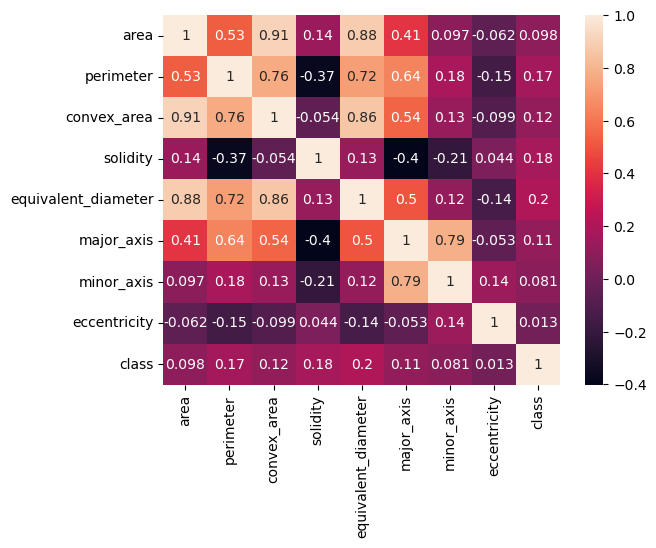

In [24]:
sns.heatmap(df.corr(numeric_only=True) , annot=True)

### 2. Feature Selection

In [25]:
df.drop(['major_axis','minor_axis'],axis=1 , inplace=True)
df

,area,perimeter,convex_area,solidity,equivalent_diameter,eccentricity,class
0,6314.5,521.972649,9855.5,0.640708,89.665328,1.378312,1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,1.658266,1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,1.335325,1
3,4486.0,275.622365,4741.5,0.946114,75.576138,1.030671,1
4,145.0,92.083260,323.5,0.448223,13.587484,1.388168,1
...,...,...,...,...,...,...,...
236,545.5,208.267025,1317.5,0.414042,26.354358,2.013375,0
237,902.0,232.166520,1444.5,0.624438,33.888967,1.800646,0
238,3177.0,217.681239,3260.0,0.974540,63.600959,0.296509,0
239,6103.0,1208.631593,51259.5,0.119061,88.150899,0.206967,0


**I dropped Major axis and Minor Axis columns because, these columns are not useful to analysis because combination these two columns is eccentricity.**

### 3. Data Cleaning and Model Building Using Pipeline

**Splitting the dataset**

In [26]:
X = df.drop('class' , axis=1)
y = df['class']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [27]:
X_train

,area,perimeter,convex_area,solidity,equivalent_diameter,eccentricity
55,1852.5,293.178714,2824.5,0.655868,48.566205,1.306842
36,733.5,145.154328,920.0,0.797283,30.560124,2.686769
138,50855.5,859.394004,51194.0,0.993388,254.462637,0.729937
65,307.0,78.083260,340.0,0.902941,19.770800,1.942288
204,3265.5,743.737149,9898.5,0.329898,64.480724,1.106041
...,...,...,...,...,...,...
121,6127.0,365.161468,6983.0,0.877417,88.324055,0.744808
14,1160.5,203.580734,1674.0,0.693250,38.439491,2.387821
103,331.0,135.195958,798.5,0.414527,20.529060,1.513443
228,565.5,190.953318,1225.5,0.461444,26.833132,0.632852


In [28]:
num_col = X_train.select_dtypes(exclude='object').columns

In [29]:
num_col

Index(['area', 'perimeter', 'convex_area', 'solidity', 'equivalent_diameter',
       'eccentricity'],
      dtype='object')

In [30]:
def name(n):
    return np.sqrt(n)

num_transformer = Pipeline(steps=[('Outliers Winsorizer' , Winsorizer(capping_method='mad' , tail='both' , fold=5)),
                                  ('Gaussian Dist ' , FunctionTransformer(func=name))])

preprocessing = ColumnTransformer([('step1' , num_transformer , num_col)] , remainder='passthrough')

pipe = Pipeline([('Preprocessing' , preprocessing),
          ('Classification' , GaussianNB())])

pipe

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1',
                                                  Pipeline(steps=[('Outliers '
                                                                   'Winsorizer',
                                                                   Winsorizer(capping_method='mad',
                                                                              fold=5,
                                                                              tail='both')),
                                                                  ('Gaussian '
                                                                   'Dist ',
                                                                   FunctionTransformer(func=<function name at 0x00000295F0493740>))]),
                                                  Index(['area', 'perimeter', 'convex_area', 'solidity', 'equivalent_diameter',
       'eccentricity'],
      dtype='object'))])),
                ('Classification', GaussianNB())])

In [31]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step1',
                                                  Pipeline(steps=[('Outliers '
                                                                   'Winsorizer',
                                                                   Winsorizer(capping_method='mad',
                                                                              fold=5,
                                                                              tail='both')),
                                                                  ('Gaussian '
                                                                   'Dist ',
                                                                   FunctionTransformer(func=<function name at 0x00000295F0493740>))]),
                                                  Index(['area', 'perimeter', 'convex_area', 'solidity', 'equivalent_diameter',
       'eccentricity'],
      dtype='object'))])),
                ('Classification', GaussianNB())])

In [32]:
y_pred = pipe.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

### 4. Machine Learning Model Evaluation

In [33]:
confusion_matrix(y_test , y_pred)

array([[ 7,  2],
       [ 6, 23]], dtype=int64)

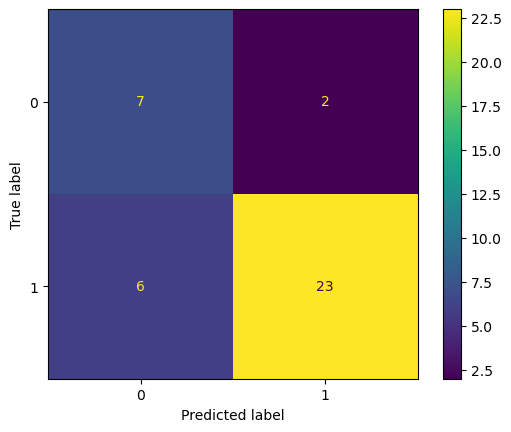

In [34]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred)).plot()

In [35]:
accuracy_score(y_test , y_pred)

0.7894736842105263

In [36]:
precision_score(y_test, y_pred)

0.92

In [37]:
print("Accuracy Score  :- " , accuracy_score(y_test , y_pred))
print("Precision Score :- " , precision_score(y_test , y_pred))
print("Recal Score     :- " , recall_score(y_test , y_pred))
print("F-1 Score       :- " , f1_score(y_test , y_pred))

Accuracy Score  :-  0.7894736842105263
Precision Score :-  0.92
Recal Score     :-  0.7931034482758621
F-1 Score       :-  0.851851851851852


In [38]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.54      0.78      0.64         9
           1       0.92      0.79      0.85        29

    accuracy                           0.79        38
   macro avg       0.73      0.79      0.74        38
weighted avg       0.83      0.79      0.80        38



In [44]:
import pickle

In [54]:
filename = r'new_brain.pkl'

pickle.dump(pipe , open(filename , 'wb'))